# 1
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-
Quality/master/winequality-red.csv

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Загрузка данных
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
df = pd.read_csv(url)

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

# Разделение на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели множественной линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициенты модели
print("Коэффициенты (веса признаков):")
for name, coef in zip(X.columns, model.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"\nСвободный член (intercept): {model.intercept_:.4f}")

# Прогноз на тестовой выборке
y_pred = model.predict(X_test)
print("\nПример прогноза (первые 5 значений):")
for i in range(5):
    print(f"Факт: {y_test.iloc[i]:.1f} → Прогноз: {y_pred[i]:.1f}")

Коэффициенты (веса признаков):
  Petrol_tax: -36.9937
  Average_income: -0.0565
  Paved_Highways: -0.0044
  Population_Driver_licence(%): 1346.8693

Свободный член (intercept): 361.4509

Пример прогноза (первые 5 значений):
Факт: 631.0 → Прогноз: 606.7
Факт: 587.0 → Прогноз: 673.8
Факт: 577.0 → Прогноз: 585.0
Факт: 591.0 → Прогноз: 563.5
Факт: 460.0 → Прогноз: 519.1


------------------------------------------------------------

# 2
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

#### variant 3
 x  | y
----|----
3,0 | 2,0
3,2 | 3,0
3,4 | 3,0
3,6 | 3,0
3,8 | 2,0
4,0 | 4,0

Линейная модель (y = a*x + b):
  a = 1.0000, b = -0.6667

Квадратичная модель (y = a*x² + b*x + c):
  a = 0.4464, b = -2.1250, c = 4.7500

Таблица значений:
 x    |   y_факт | y_линей | y_квадр
------|----------|---------|--------
 3.0  |     2.0  |    2.33 |    2.39
 3.2  |     3.0  |    2.53 |    2.52
 3.4  |     3.0  |    2.73 |    2.69
 3.6  |     3.0  |    2.93 |    2.89
 3.8  |     2.0  |    3.13 |    3.12
 4.0  |     4.0  |    3.33 |    3.39


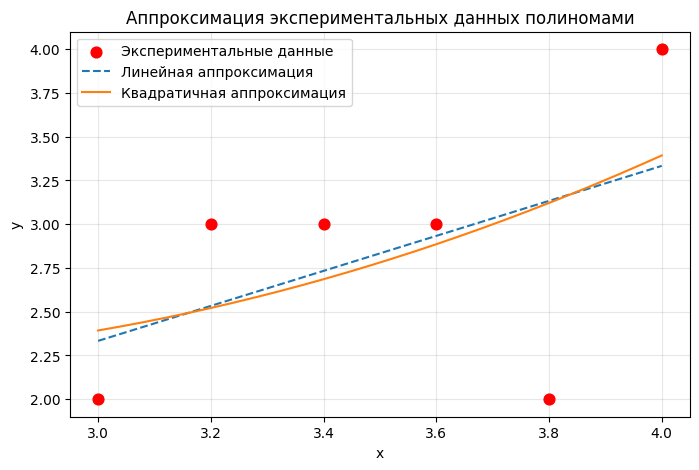

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])


'''
Аппроксимация полиномами
'''
coef1 = np.polyfit(x, y, 1)  # линейный (1-я степень)
coef2 = np.polyfit(x, y, 2)  # квадратичный (2-я степень)


'''
Создаём гладкую ось для графика
'''
x_smooth = np.linspace(x.min(), x.max(), 200)
y1_smooth = np.polyval(coef1, x_smooth)
y2_smooth = np.polyval(coef2, x_smooth)


'''
Вывод коэффициентов
'''
print("Линейная модель (y = a*x + b):")
print(f"  a = {coef1[0]:.4f}, b = {coef1[1]:.4f}")
print("\nКвадратичная модель (y = a*x² + b*x + c):")
print(f"  a = {coef2[0]:.4f}, b = {coef2[1]:.4f}, c = {coef2[2]:.4f}")


'''
Таблица значений
'''
print("\nТаблица значений:")
print(" x    |   y_факт | y_линей | y_квадр")
print("------|----------|---------|--------")
for xi, yi in zip(x, y):
    y1 = np.polyval(coef1, xi)
    y2 = np.polyval(coef2, xi)
    print(f"{xi:4.1f}  |  {yi:6.1f}  |  {y1:6.2f} |  {y2:6.2f}")


'''
Построение графика
'''
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', s=60, zorder=5, label='Экспериментальные данные')
plt.plot(x_smooth, y1_smooth, '--', label='Линейная аппроксимация')
plt.plot(x_smooth, y2_smooth, '-', label='Квадратичная аппроксимация')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация экспериментальных данных полиномами')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()